### Algorithm steps

*For each tree

1) Randomly select n sample

2) Build tree using random split

3) Compute path length for each data point

### 2) After Building all trees

1) Compute avg path length

2) Normalize using c(n)|Avg path

3) Compute anamoly score 

4) classify using contimination threshold 

H(n)=log(n)+0.5777

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo
air_quality = fetch_ucirepo(id=360)
df=air_quality.data.features

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
features=df[['CO(GT)',   'C6H6(GT)',  'NOx(GT)', 'NO2(GT)', ]]

In [6]:
features.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [8]:
n_estiamators=100

contimation=0.01
sample_size=256


In [9]:
model=IsolationForest(n_estimators=n_estiamators, max_samples=sample_size, contamination=contimation, random_state=42)
model.fit(features)
anamoly_labels=model.predict(features)
anamoly_labels

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
features['anamoly']=anamoly_labels
features.head()

C:\Users\HARSHA VARDHAN\AppData\Local\Temp\ipykernel_13716\404536313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anamoly']=anamoly_labels


,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anamoly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [11]:
features.value_counts('anamoly')

anamoly
 1    9263
-1      94
Name: count, dtype: int64

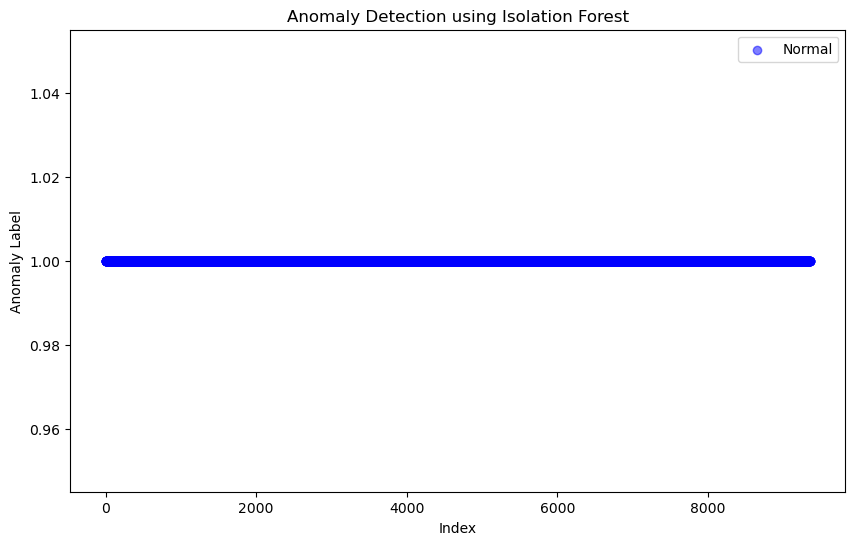

In [12]:
plt.figure(figsize=(10,6))
normal_data=features[features['anamoly']==1]
plt.scatter(normal_data.index, normal_data['anamoly'],color='blue', label='Normal', alpha=0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

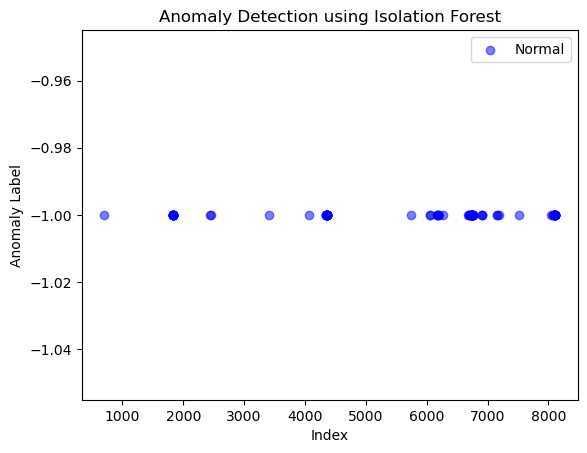

In [13]:
anamolies=features[features['anamoly']==-1]
plt.scatter(anamolies.index, anamolies['anamoly'],color='blue', label='Normal', alpha=0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Anomaly Detection using Isolation Forest')

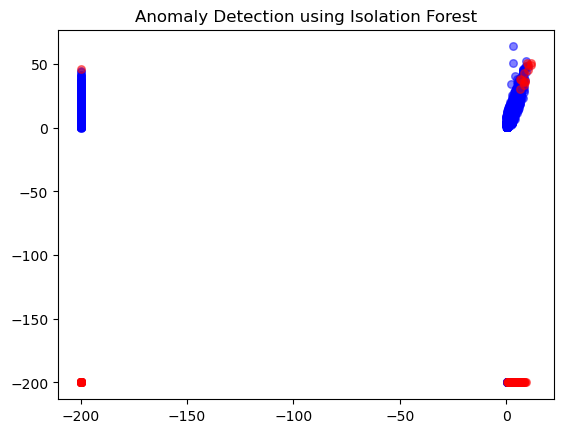

In [14]:
plt.subplots=(1,2,1)
plt.scatter(normal_data['CO(GT)'], normal_data['C6H6(GT)'], color='blue', label='Normal', alpha=0.5,s=30)
plt.scatter(anamolies['CO(GT)'], anamolies['C6H6(GT)'], color='red', label='Anomaly', alpha=0.5,s=30)
plt.title('Anomaly Detection using Isolation Forest')

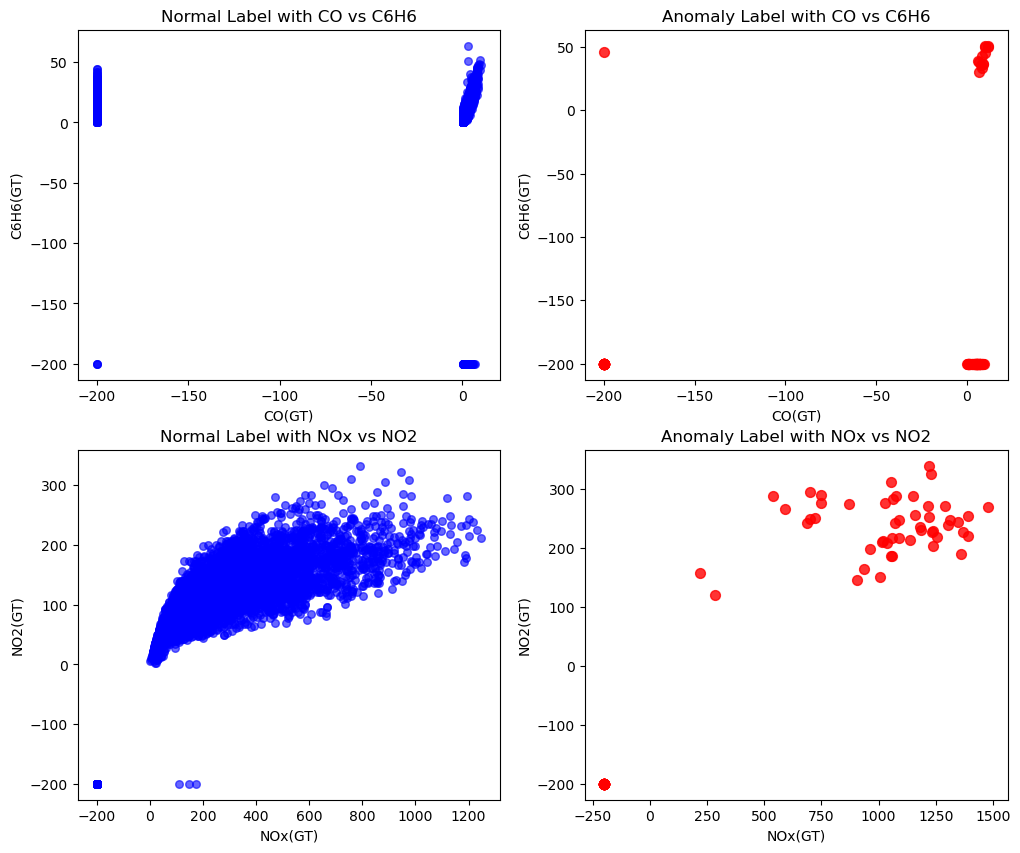

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(normal_data['CO(GT)'],normal_data['C6H6(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
plt.title("Normal Label with CO vs C6H6")
plt.subplot(2,2,2)
plt.scatter(anamolies['CO(GT)'],anamolies['C6H6(GT)'],color='red',label='Anomaly',alpha=0.8,s=50)
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
plt.title("Anomaly Label with CO vs C6H6")
plt.subplot(2,2,3)
plt.scatter(normal_data['NOx(GT)'],normal_data['NO2(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
plt.xlabel("NOx(GT)")
plt.ylabel("NO2(GT)")
plt.title("Normal Label with NOx vs NO2")
plt.subplot(2,2,4)
plt.scatter(anamolies['NOx(GT)'],anamolies['NO2(GT)'],color='red',label='Anomaly',alpha=0.8,s=50)
plt.xlabel("NOx(GT)")
plt.ylabel("NO2(GT)")
plt.title("Anomaly Label with NOx vs NO2")
plt.show()

In [20]:
import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = features[features['anamoly'] == 1]
anomaly = features[features['anamoly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700
)
 
fig.show()
 
 